In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#lendo arquivos
log = open("data_vss/log.txt",'r')

df_min = pd.read_csv("data_vss/vss20190117dmin.min",skiprows=24,sep="\s+",usecols=[0,1,2,3,4,5,6])
for linha in range(4):
    log.readline()
for caminho in log:
    caminho = caminho.strip()[:-2]
    df2 = pd.read_csv("data_vss/"+caminho,skiprows=24,sep="\s+",usecols=[0,1,2,3,4,5,6])
    df_min = pd.concat([df_min, df2])
    
log.close()
df_min.head()

,DATE,TIME,DOY,VSSX,VSSY,VSSZ,VSSG
0,2019-01-17,00:00:00.000,17,16484.7,-6926.9,-14876.6,0.1
1,2019-01-17,00:01:00.000,17,16485.3,-6927.1,-14876.4,0.1
2,2019-01-17,00:02:00.000,17,16485.7,-6927.2,-14876.2,0.1
3,2019-01-17,00:03:00.000,17,16486.4,-6927.3,-14876.0,0.1
4,2019-01-17,00:04:00.000,17,16487.0,-6927.3,-14875.9,0.2


In [3]:
#mudando o range: minutos -> dias (meia noite)
horario = "00:00:00.000"
df_dia = df_min[df_min.TIME == horario ].reset_index(drop=True)
#excuindo outliers
df_dia = df_dia[df_dia.VSSX != 99999.0]
df_dia = df_dia[df_dia.VSSY != 99999.0]
df_dia = df_dia[df_dia.VSSZ != 99999.0]
#salvando
df_dia.to_csv("vss_2019_dia")
df_dia.head()

,DATE,TIME,DOY,VSSX,VSSY,VSSZ,VSSG
0,2019-01-17,00:00:00.000,17,16484.7,-6926.9,-14876.6,0.1
1,2019-01-18,00:00:00.000,18,16505.9,-6932.3,-14875.7,0.1
2,2019-01-19,00:00:00.000,19,16523.1,-6934.0,-14871.8,0.1
3,2019-01-20,00:00:00.000,20,16511.8,-6937.1,-14870.4,0.2
4,2019-01-21,00:00:00.000,21,16522.2,-6932.7,-14872.2,99999.0


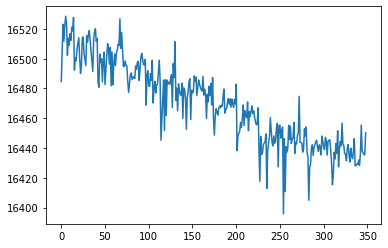

In [5]:
#testando
plt.plot(df_dia.index,df_dia.VSSX)
plt.show()